## Prompt chaining

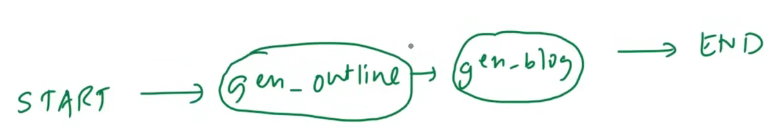

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI()

In [4]:
# creating the state
class BlogState(TypedDict):
    
    title  :str
    outline : str
    content : str

In [5]:
def create_outline(state : BlogState) -> BlogState:
    
    # fetch title
    
    title = state['title']
    
    # call llm gen outline
    prompt = f'Generate an outline for a blog on the topic {title}'
    outline = model.invoke(prompt).content
    
    # update state
    state['outline'] = outline
    
    
    return state

In [6]:
def create_blog(state : BlogState) -> BlogState :
    
    # fetch title
    
    title = state['title']
    outline = state['outline'] # current outline
    
    # call llm create blog
    prompt = f'Write a detailed blog on the title {title} using the following outline \n {outline}'
    content = model.invoke(prompt).content
    
    state['content'] = content
    
    return state

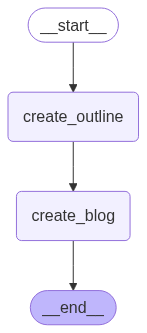

In [7]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)


# edges

graph.add_edge(START, 'create_outline')

graph.add_edge('create_outline', 'create_blog')

graph.add_edge('create_blog', END)

graph.compile()

In [14]:
# compile the model
workflow = graph.compile()


# add initial_state
initial_state = {'title':'Rise of AI in India and job effect in less than 80 words'}
final_state = workflow.invoke(initial_state)


print(final_state)


{'title': 'Rise of AI in India and job effect in less than 80 words', 'outline': 'I. Introduction\n    A. Brief overview of the rise of AI in India\n    B. Importance of understanding the impact on job market\n\nII. Current scenario of AI in India\n    A. Major industries integrating AI technology\n    B. Growth of AI startups in the country\n\nIII. Job effects of AI in India\n    A. Job displacement due to automation\n    B. Creation of new job opportunities in AI industry\n    C. Impact on traditional job sectors \n\nIV. Government initiatives and policies to address job effects\n    A. Training and reskilling programs\n    B. Regulations for AI implementation in workforce\n\nV. Conclusion\n    A. Summary of key points discussed\n    B. Future outlook for AI and job market in India.', 'content': 'The rise of AI in India has brought about significant changes in the job market, leading to both job displacement and the creation of new opportunities. Major industries like healthcare, fin

In [15]:
print(final_state['outline'])

I. Introduction
    A. Brief overview of the rise of AI in India
    B. Importance of understanding the impact on job market

II. Current scenario of AI in India
    A. Major industries integrating AI technology
    B. Growth of AI startups in the country

III. Job effects of AI in India
    A. Job displacement due to automation
    B. Creation of new job opportunities in AI industry
    C. Impact on traditional job sectors 

IV. Government initiatives and policies to address job effects
    A. Training and reskilling programs
    B. Regulations for AI implementation in workforce

V. Conclusion
    A. Summary of key points discussed
    B. Future outlook for AI and job market in India.


In [13]:
print(final_state['content'])



I. Introduction

The rise of artificial intelligence (AI) in India has been a significant trend in recent years, with the technology making its way into various industries and transforming the way businesses operate. AI refers to the simulation of human intelligence processes by machines, including learning, reasoning, and self-correction. In India, AI is being used in sectors such as finance, healthcare, agriculture, education, and more, to improve efficiency, reduce costs, and enhance decision-making processes.

II. AI in the Indian Job Market

AI has both positive and negative implications for the job market in India. On one hand, AI has the potential to create new job opportunities in fields such as data science, machine learning, and robotics. However, it also has the potential to displace jobs in industries such as manufacturing, customer service, and transportation, as automation becomes more prevalent.

Examples of industries where AI is transforming job roles include custome